# Airline Passenger Satisfaction - Preprocessing

### Cel projektu
Głównym celem projektu jest zaprojektowanie klasyfikatora umożliwiającego ocenę zadowolenia pasarzerów linii lotniczych.
Dane

### Do treningu oraz optymalizacji modelu wykorzystane zostaną dane ze zbioru Airline Passenger Satisfaction.
Zbiór zawiera informacje zwrotne z ankiet wypełnianych przez klientów korzystających US Airline. Jedną z cech jest ocena ogólna, która przyjmuje dwie możliwe wartości: "satisfied" lub "neutral/dissatisfied", które to będą stanowić klasy wyjściowe modelu.

### Kolejne kroki realizacji
1. Analiza oraz preprocessing danych.
2. Określenie istotności poszczególnych cech danych oraz ich korelacji z klasami wyjściowymi.
3. Utworzenie modelu klasyfikatora.
4. Optymalizacja klasyfikatora.
5. Testy oraz podsumowanie wyników.


In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# loading data
train = pd.read_csv('finalDataset2/train.csv')
# df_train['type']="train"
test = pd.read_csv('finalDataset2/test.csv')
# df_test['type']="test"

In [3]:
# combining train and test data
data = pd.concat([test.assign(ind="test"), train.assign(ind="train")])

In [4]:
# presenting data
data.drop(['id'], 1, inplace=True)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(data.head())
data.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Male,Female,ind
0,1.0,52.0,1.0,0.0,160.0,5.0,4.0,3.0,4.0,3.0,...,5.0,2.0,5.0,5.0,50.0,44.0,1.0,0.0,1.0,test
1,1.0,36.0,1.0,2.0,2863.0,1.0,1.0,3.0,1.0,5.0,...,4.0,3.0,4.0,5.0,0.0,0.0,1.0,0.0,1.0,test
2,0.0,20.0,1.0,0.0,192.0,2.0,0.0,2.0,4.0,2.0,...,3.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,test
3,1.0,44.0,1.0,2.0,3377.0,0.0,0.0,0.0,2.0,3.0,...,1.0,3.0,1.0,4.0,0.0,6.0,1.0,1.0,0.0,test
4,1.0,49.0,1.0,0.0,1182.0,2.0,3.0,4.0,3.0,4.0,...,2.0,4.0,2.0,4.0,0.0,20.0,1.0,0.0,1.0,test


## Filling missing data

In [5]:
# data staticstics
data.describe()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Male,Female
count,129360.000000,129360.000000,129360.000000,129360.000000,129360.00000,129360.000000,129360.000000,129360.000000,129360.000000,129360.000000,...,129360.000000,129360.000000,129360.000000,129360.000000,129360.000000,129360.000000,128970.000000,129360.000000,129360.000000,129360.000000
mean,0.816860,39.430728,0.690716,1.029692,1190.33464,2.729004,3.057638,2.756865,2.976685,3.205295,...,3.350974,3.631903,3.306416,3.642084,3.286534,14.715353,15.090083,0.434392,0.492525,0.507452
std,0.386783,15.122226,0.462200,0.962636,997.31967,1.329456,1.526884,1.401847,1.278507,1.329918,...,1.316270,1.180072,1.266022,1.176618,1.313549,38.101303,38.471614,0.495679,0.499946,0.499946
min,0.000000,7.000000,0.000000,0.000000,31.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,27.000000,0.000000,0.000000,414.00000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,40.000000,1.000000,1.000000,844.00000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,51.000000,1.000000,2.000000,1744.00000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,1.000000,1.000000
max,1.000000,85.000000,1.000000,2.000000,4983.00000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000,1.000000,1.000000


In [6]:
# number of missing data in each column
data.isna().sum()

Customer Type                        520
Age                                  520
Type of Travel                       520
Class                                520
Flight Distance                      520
Inflight wifi service                520
Departure/Arrival time convenient    520
Ease of Online booking               520
Gate location                        520
Food and drink                       520
Online boarding                      520
Seat comfort                         520
Inflight entertainment               520
On-board service                     520
Leg room service                     520
Baggage handling                     520
Checkin service                      520
Inflight service                     520
Cleanliness                          520
Departure Delay in Minutes           520
Arrival Delay in Minutes             910
satisfaction                         520
Male                                 520
Female                               520
ind             

### Mean completion

In [7]:
# filling missing data with mean
data['Age'] = data['Age'].fillna(data['Age'].mean())

### Median completion

In [8]:
# filling missing data with median
cols = ['Customer Type', 'Type of Travel', 'Class', 
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'satisfaction', 'Male', 'Female']
data[cols] = data[cols].fillna(data[cols].median())
# data.isna().sum()

### Interpolation

In [9]:
# filling missing data by interpolation
cols = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
data[cols] = data[cols].interpolate()

In [10]:
data.isna().sum()

Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
Male                                 0
Female                               0
ind                                  0
dtype: int64

In [11]:
# number of unique data in each column
dic = {}
for x in data.columns:
    dic.update({x : len(set(data[x]))})
dic

# set(data_interpolated['Male'])

{'Customer Type': 2,
 'Age': 76,
 'Type of Travel': 2,
 'Class': 3,
 'Flight Distance': 4095,
 'Inflight wifi service': 6,
 'Departure/Arrival time convenient': 6,
 'Ease of Online booking': 6,
 'Gate location': 6,
 'Food and drink': 6,
 'Online boarding': 6,
 'Seat comfort': 6,
 'Inflight entertainment': 6,
 'On-board service': 6,
 'Leg room service': 6,
 'Baggage handling': 5,
 'Checkin service': 6,
 'Inflight service': 6,
 'Cleanliness': 6,
 'Departure Delay in Minutes': 522,
 'Arrival Delay in Minutes': 550,
 'satisfaction': 2,
 'Male': 2,
 'Female': 2,
 'ind': 2}

array([[<AxesSubplot:title={'center':'Customer Type'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Type of Travel'}>,
        <AxesSubplot:title={'center':'Class'}>,
        <AxesSubplot:title={'center':'Flight Distance'}>],
       [<AxesSubplot:title={'center':'Inflight wifi service'}>,
        <AxesSubplot:title={'center':'Departure/Arrival time convenient'}>,
        <AxesSubplot:title={'center':'Ease of Online booking'}>,
        <AxesSubplot:title={'center':'Gate location'}>,
        <AxesSubplot:title={'center':'Food and drink'}>],
       [<AxesSubplot:title={'center':'Online boarding'}>,
        <AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>,
        <AxesSubplot:title={'center':'On-board service'}>,
        <AxesSubplot:title={'center':'Leg room service'}>],
       [<AxesSubplot:title={'center':'Baggage handling'}>,
        <AxesSubplot:title={'center':'Checkin service'}>,
 

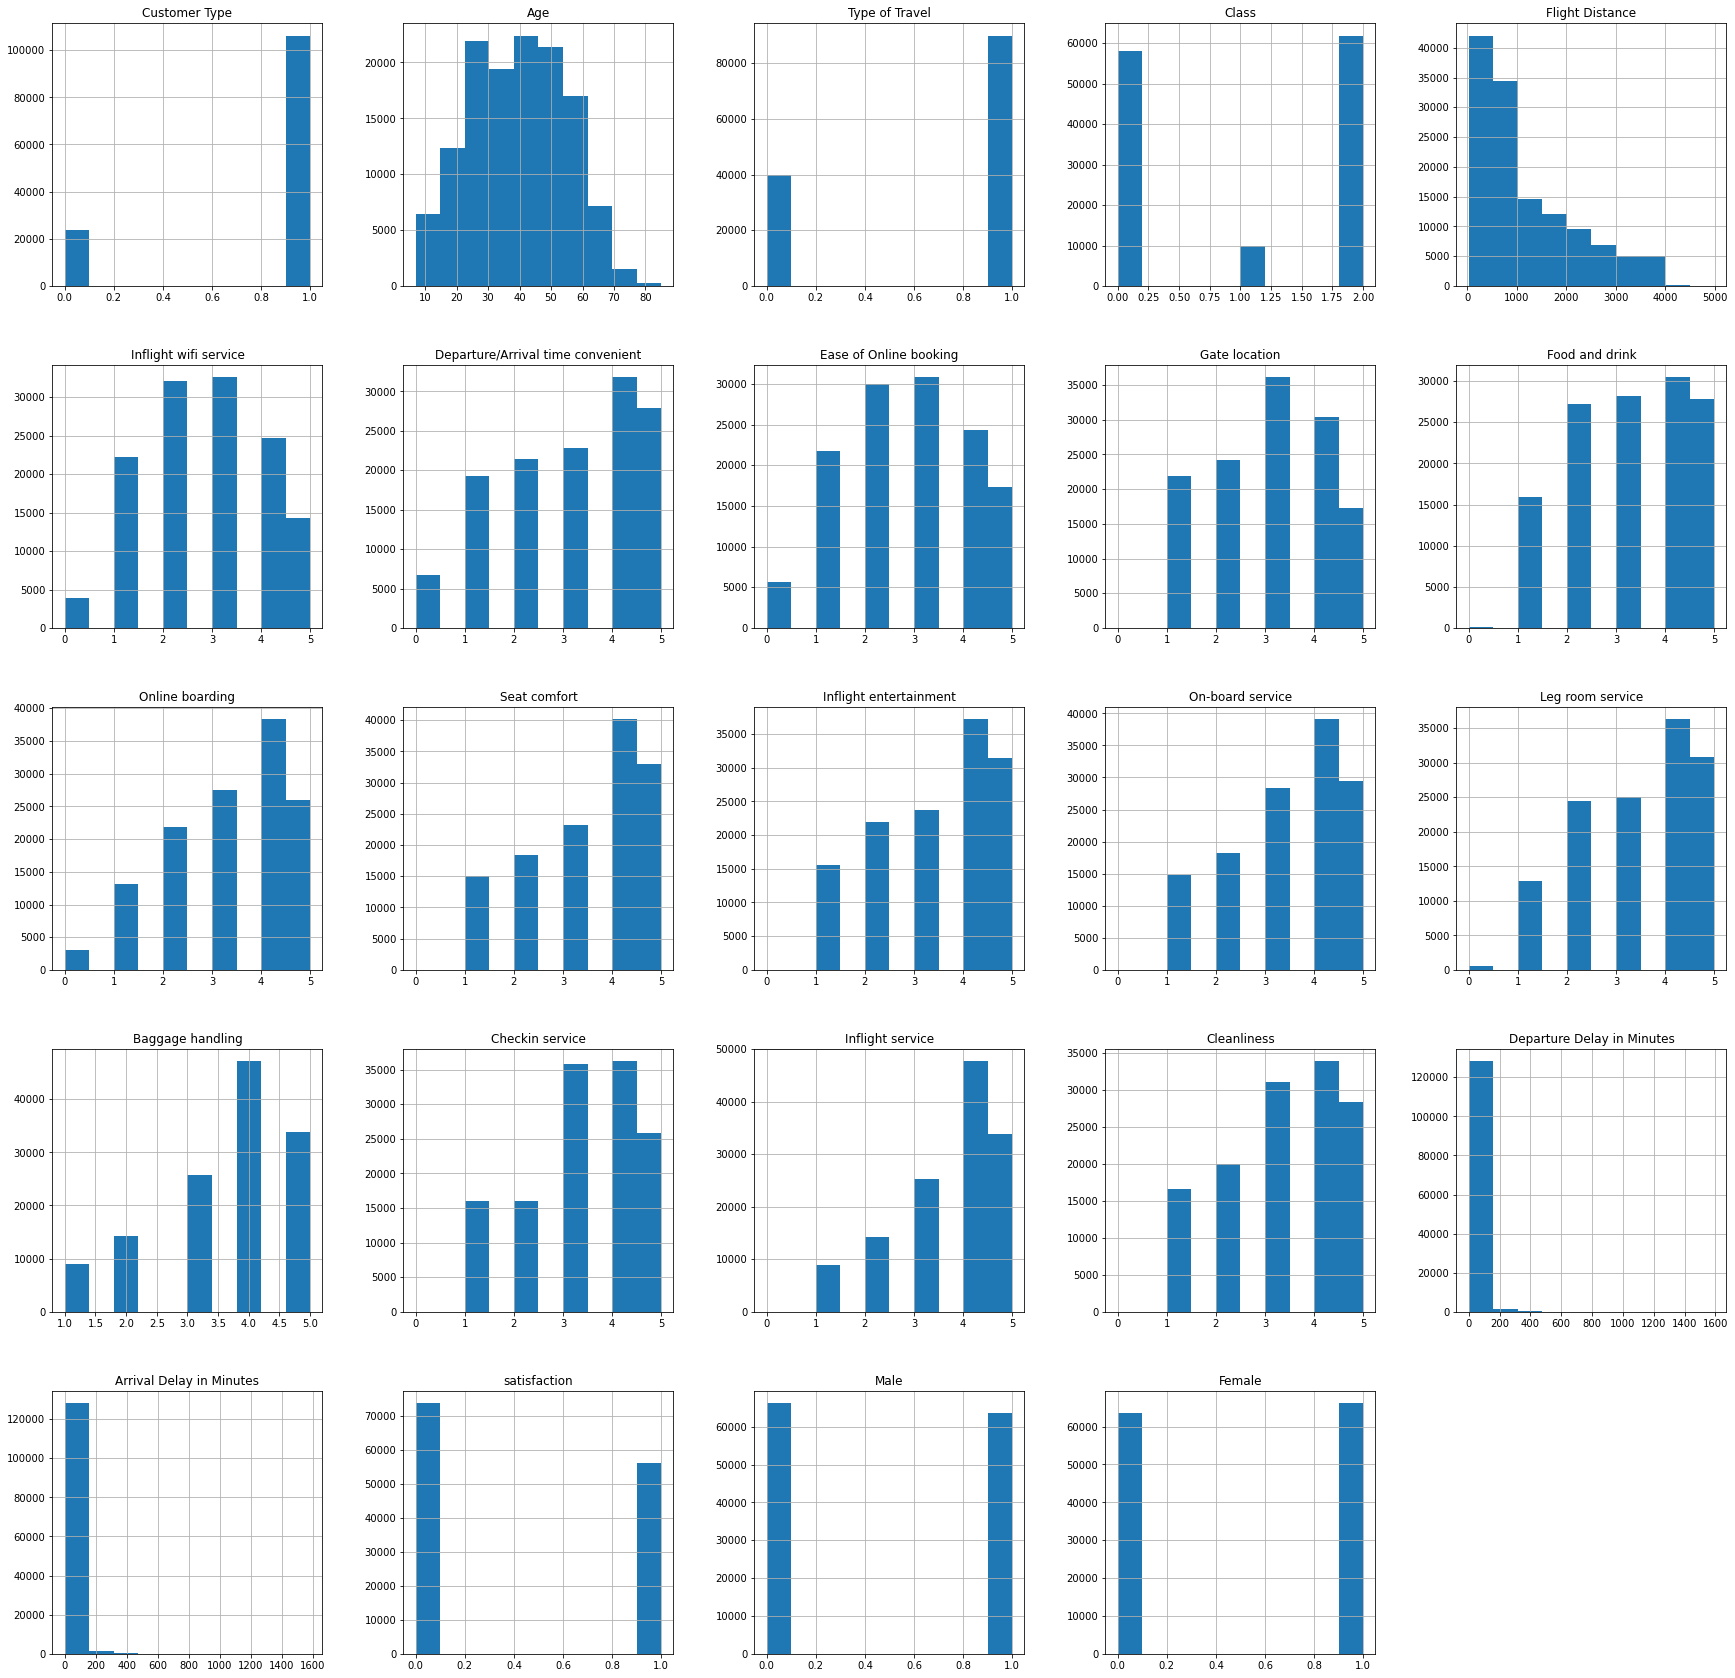

In [12]:
data.hist(figsize=(30, 30))

## Data distribution

In [13]:
from matplotlib.pyplot import figure
# age = data['Flight Distance']
# plt.hist(np.log(age))
def plotHist(data, title=''):
    plt.hist(data)
    plt.title(title)
    plt.show()
    plt.close()

('Flight Distance', 1.1077870154663216)


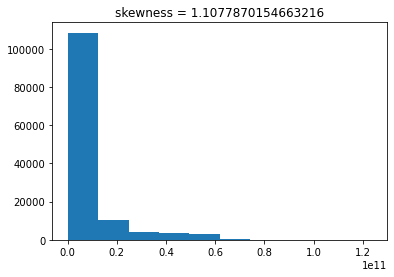

('Departure Delay in Minutes', 6.828459030836458)


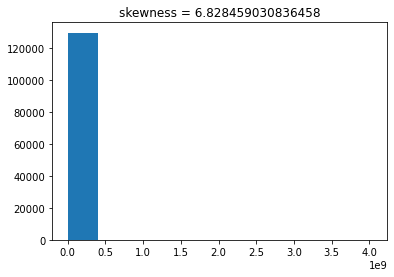

('Arrival Delay in Minutes', 6.683078893326015)


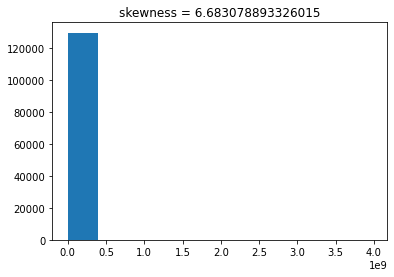

In [14]:
# Histograms of transformed columns with skewed distribution
comlsNotToPlot = ['Type of Travel', 'satisfaction', 'Male', 'Female', 'Customer Type', 'ind']
df = data.drop(comlsNotToPlot, 1)
for x in zip(df.columns, df.skew(axis=0)):
    if x[1] > 1: # positive/right skewd
        print(x)
        plotHist((data[x[0]]*data[x[0]]*data[x[0]]), 'skewness = '+str(x[1]))
    elif x[1] < -1: # negative/left skewd
        print(x)
        plotHist(np.log(data[x[0]]), x[1])

In [15]:
from matplotlib.pyplot import figure
# age = data['Flight Distance']
# plt.hist(np.log(age))
def plotBox(data, title=''):
    plt.boxplot(data)
    plt.title(title)
    plt.show()
    plt.close()

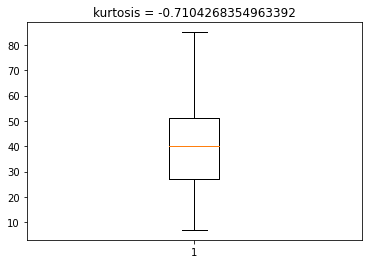

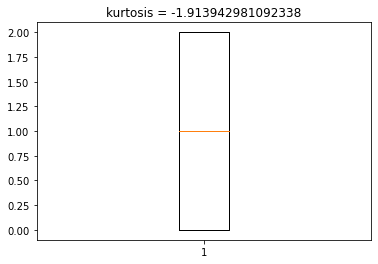

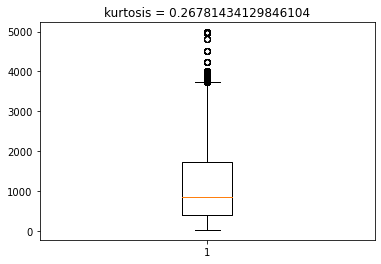

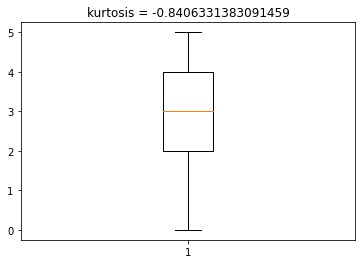

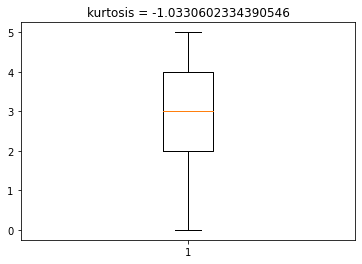

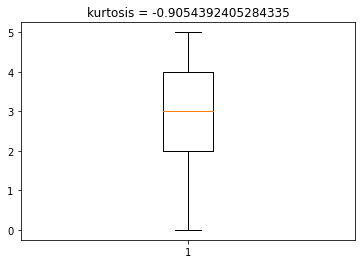

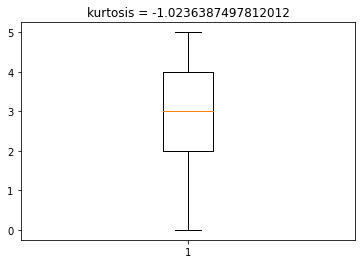

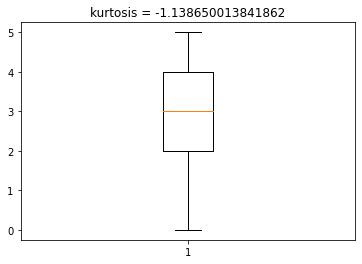

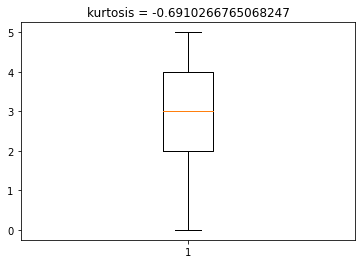

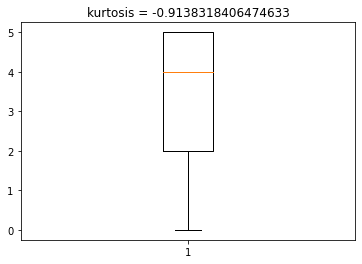

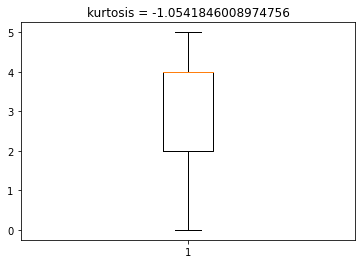

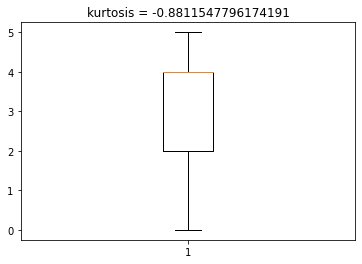

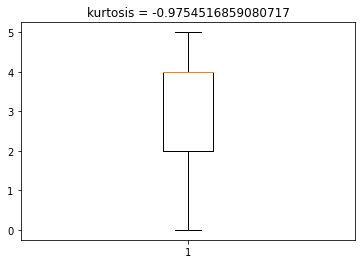

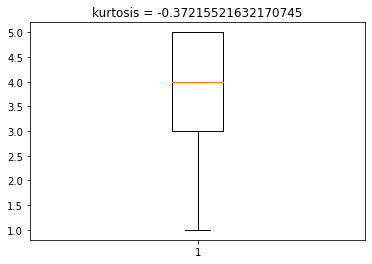

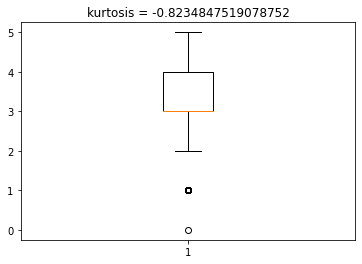

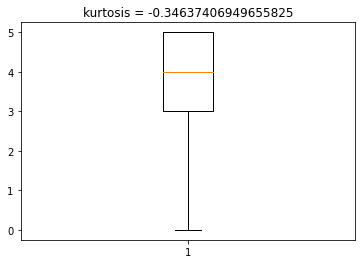

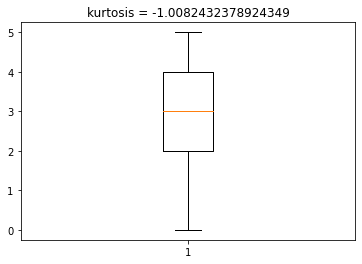

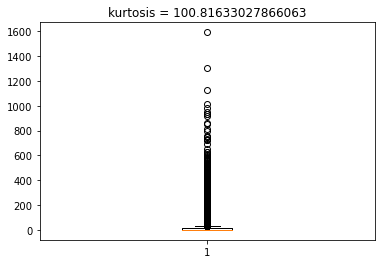

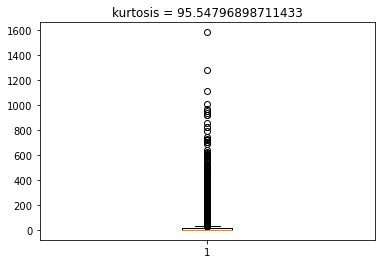

In [16]:
# Boxplots
for x in zip(df.columns, df.kurt(axis=0)):
    plotBox((data[x[0]]), 'kurtosis = '+str(x[1]))

In [17]:
# number of elements
data.count(axis=0)[0]

129880

In [18]:
comlsNotToChange = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes','ind']
df = data.drop(comlsNotToChange, 1)
# Removing outliers using z-score
from scipy.stats import zscore
z_scores = zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]
new_df.count(axis=0)[0]

129850

In [19]:
#number of removed records with outliers
df.count(axis=0)[0] - new_df.count(axis=0)[0]

30

In [20]:
data[df.columns] = df

<AxesSubplot:>

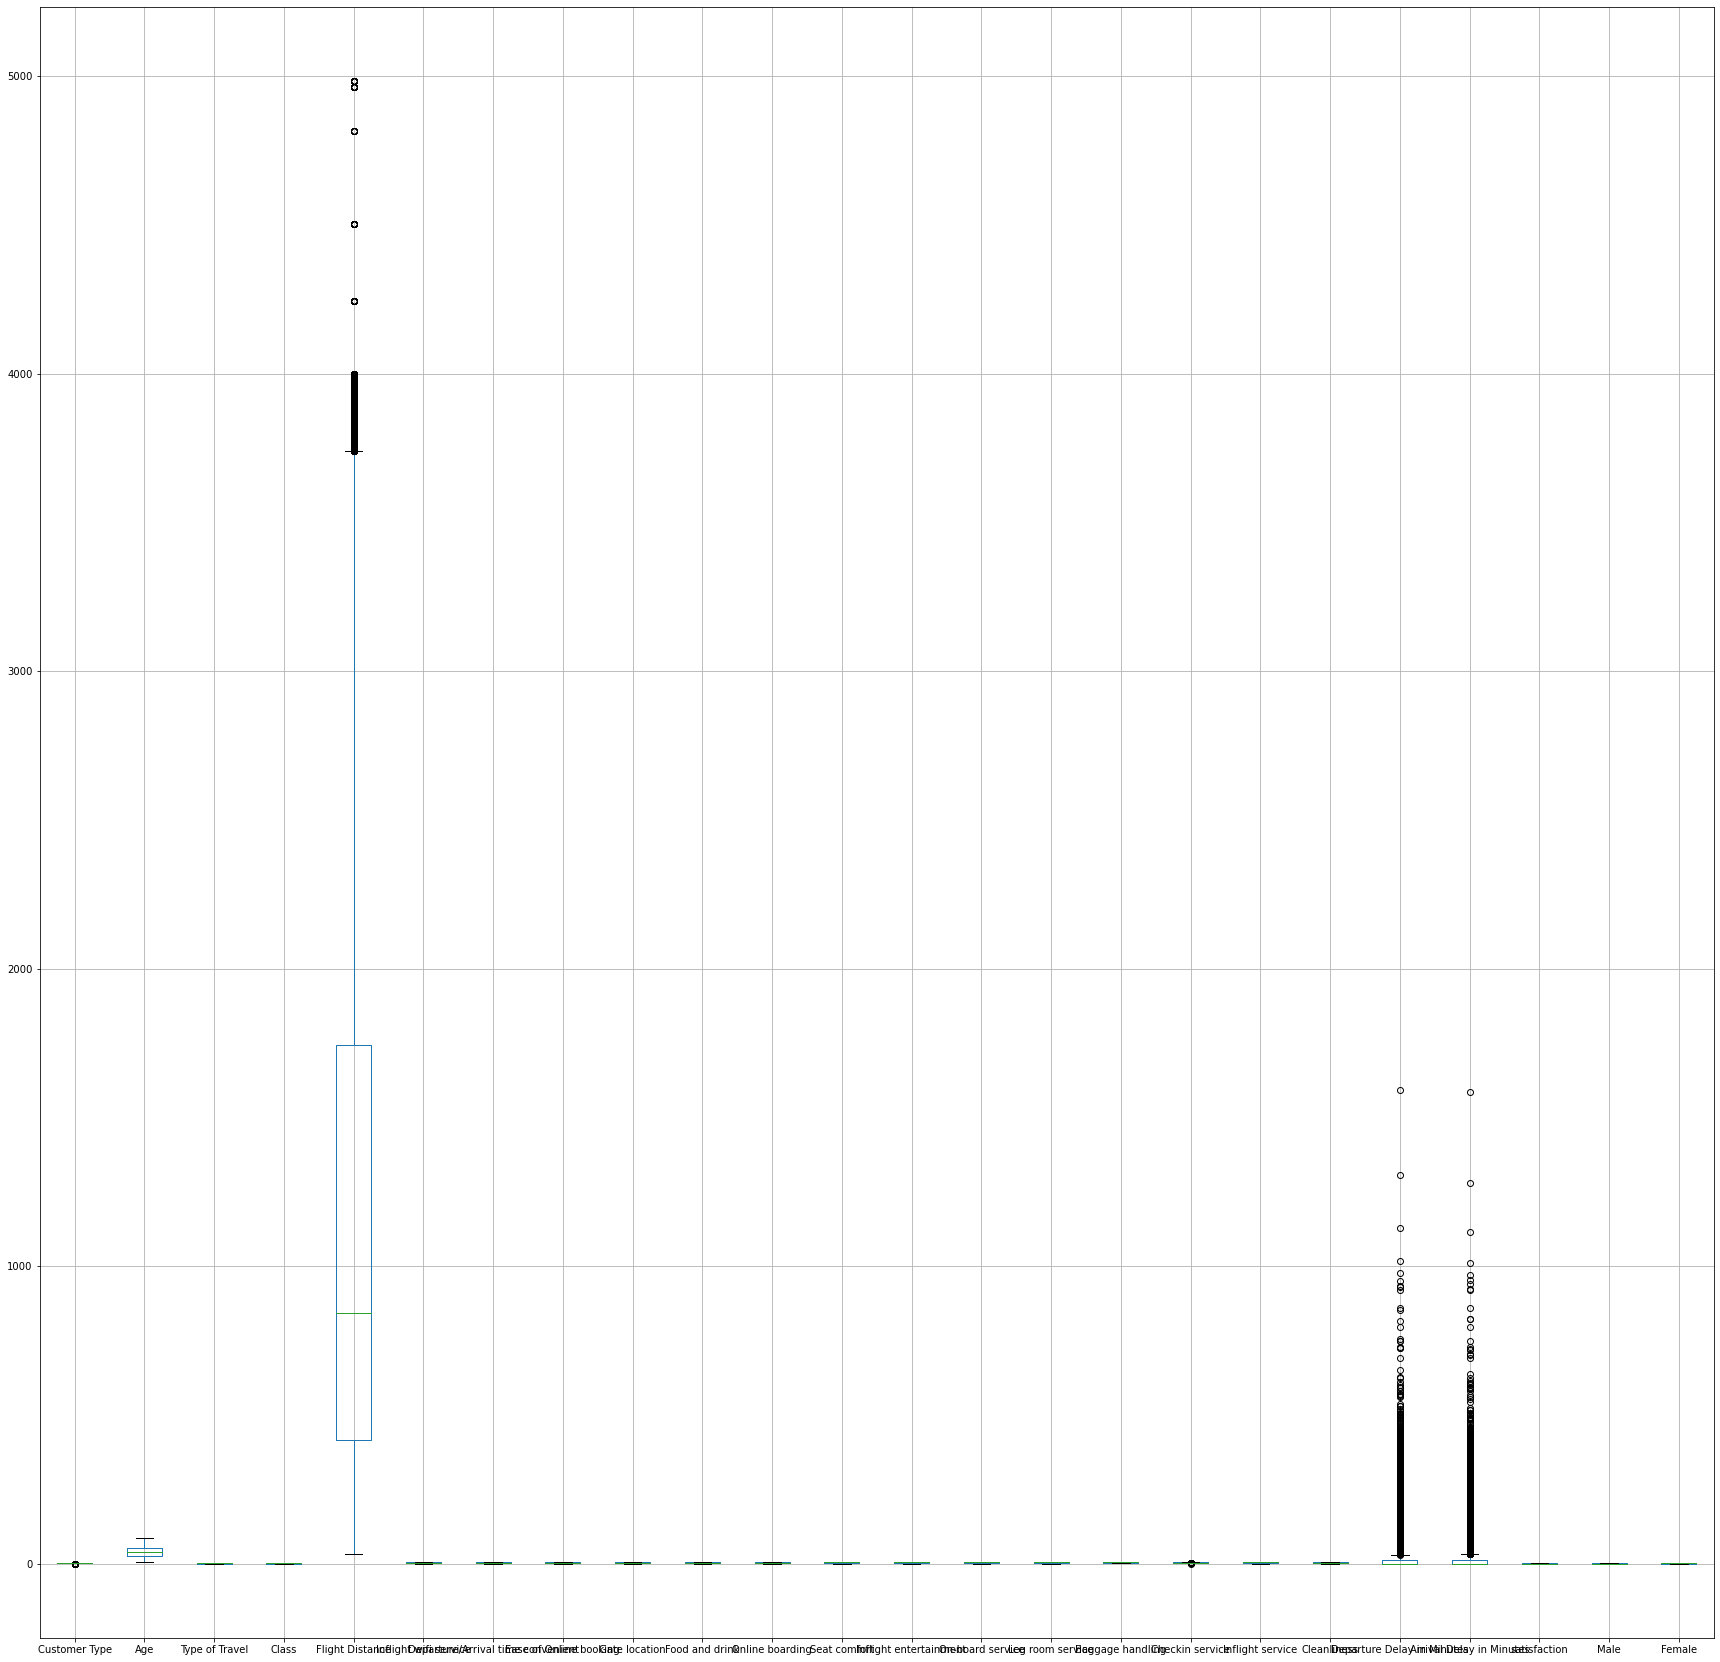

In [21]:
data.boxplot(figsize=(30,30))

### Data Visualization

In [22]:
def plotScatter(x, y, target, title=''):
    figure(figsize=(10, 10))
    plt.scatter(x, y, title, c = target)

In [23]:
# df = data
# for colm in df:
#     for colm2 in df:
#         if colm != colm2: data.plot.scatter(colm, colm2, data['satisfaction'])

In [24]:
# df = data
# for colm in df:
#     for colm2 in df:
#         if colm != colm2: data.plot.scatter(colm, colm2, data['Age'])

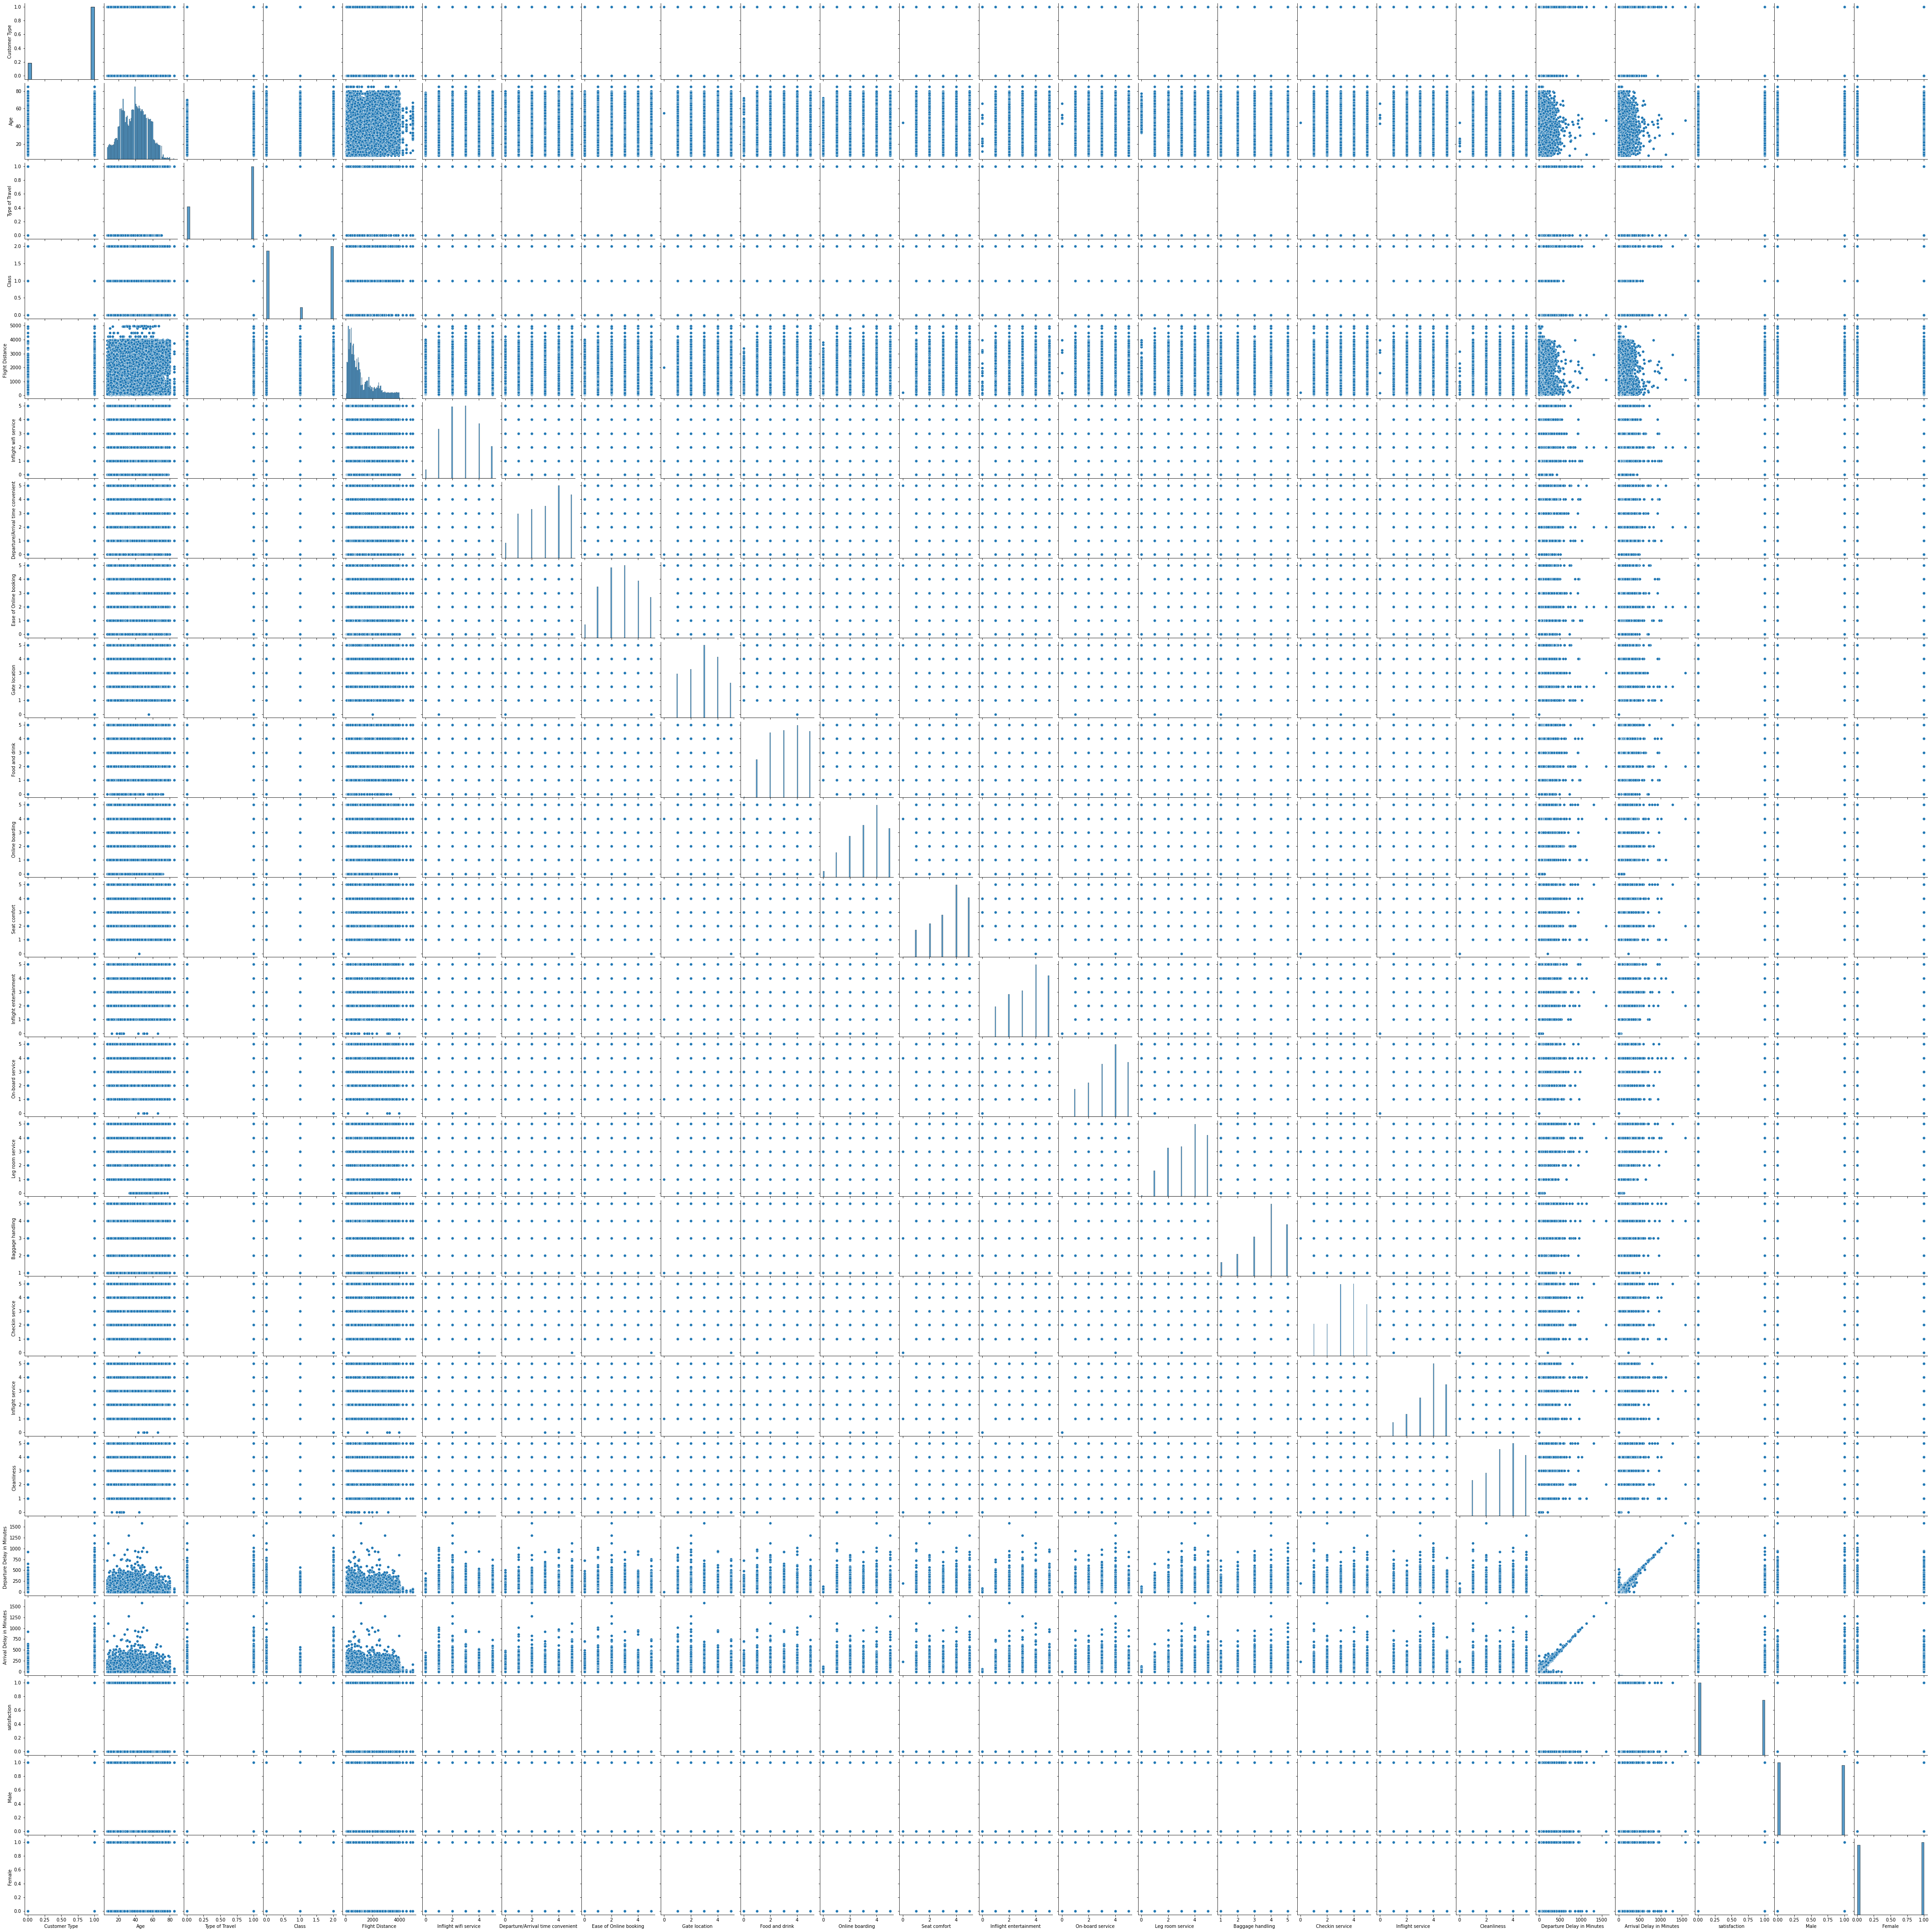

In [25]:
import seaborn as sns
sns.pairplot(data)

# Airline Passenger Satisfaction - Scalling

To-do list:
- skalowanie danych (min-max + std scaler) - ręcznie ze wzoru
- porównanie kilku histogramów przed oraz po sklowaniu obiema metodami, komentarz w notebooku
- komentarz do poedjemowanych działań
- napisać dokładnie co będzie przedmiotem predykcji

### Imports

In [26]:
import pandas as pd
import numpy as np

### Min-max scaller

In [27]:
def min_max_scaller(data):
    new_data = data.to_numpy()
    mini = np.amin(new_data, axis=0)
    new_min = np.amin(new_data, axis=0)
    maxi = np.amax(new_data, axis=0)
    new_max = np.amax(new_data, axis=0)
    result_data = []

    for ind, row in enumerate(new_data):
        result_data.append((row - mini)/(maxi - mini) * (new_max - new_min) + new_min)
        new_data = np.delete(new_data, (0), axis=0)
        if np.shape(new_data)[0] != 0:
            new_min = np.amin(new_data, axis=0)
            new_max = np.amax(new_data, axis=0)

    return result_data

### Std scaller

In [28]:
def std_scaller(data):
    mean = data.mean()
    std = data.std()
    return (data - mean)/std

In [29]:
# temporary drop of column
# tmp_df = data_interpolated['ind'].copy()
# data_interpolated = data_interpolated.drop(['ind'], axis=1)

tmp_df = data[['ind', 'satisfaction']].copy()
data = data.drop(['ind', 'satisfaction'], axis=1)

In [30]:
minMaxData = pd.DataFrame(min_max_scaller(data), columns=data.columns.to_list())
stdData = std_scaller(data)

In [31]:
data = pd.DataFrame(min_max_scaller(data), columns=data.columns.to_list())
data = std_scaller(data)

In [32]:
minMaxData['ind'] = tmp_df['ind'].to_numpy()
stdData['ind'] = tmp_df['ind'].to_numpy()
data['ind'] = tmp_df['ind'].to_numpy()

minMaxData['satisfaction'] = tmp_df['satisfaction'].to_numpy()
stdData['satisfaction'] = tmp_df['satisfaction'].to_numpy()
data['satisfaction'] = tmp_df['satisfaction'].to_numpy()

In [33]:
dic = {}

for x in data.columns:
    dic.update({x : len(set(data[x]))})
dic

# set(data_interpolated['Male'])

{'Customer Type': 2,
 'Age': 445,
 'Type of Travel': 2,
 'Class': 3,
 'Flight Distance': 9692,
 'Inflight wifi service': 13,
 'Departure/Arrival time convenient': 13,
 'Ease of Online booking': 14,
 'Gate location': 14,
 'Food and drink': 12,
 'Online boarding': 13,
 'Seat comfort': 10,
 'Inflight entertainment': 11,
 'On-board service': 12,
 'Leg room service': 10,
 'Baggage handling': 6,
 'Checkin service': 12,
 'Inflight service': 14,
 'Cleanliness': 13,
 'Departure Delay in Minutes': 1104,
 'Arrival Delay in Minutes': 1213,
 'Male': 2,
 'Female': 2,
 'ind': 2,
 'satisfaction': 2}

In [34]:
data.iloc[0]

Customer Type                        0.472335
Age                                  0.848788
Type of Travel                       0.667217
Class                                -1.07168
Flight Distance                      -1.03718
Inflight wifi service                 1.71065
Departure/Arrival time convenient    0.618515
Ease of Online booking                0.17302
Gate location                        0.737944
Food and drink                      -0.155107
Online boarding                      0.555049
Seat comfort                        -0.597013
Inflight entertainment                1.22372
On-board service                      1.24914
Leg room service                      1.25257
Baggage handling                      1.16019
Checkin service                      -1.43074
Inflight service                      1.14886
Cleanliness                           1.29785
Departure Delay in Minutes            1.02268
Arrival Delay in Minutes             0.839869
Male                              

In [35]:
minMaxData.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Male,Female,ind,satisfaction
0,1.0,52.0,1.0,0.0,160.0,5.0,4.0,3.0,4.0,3.0,...,5.0,2.0,5.0,5.0,50.0,44.0,0.0,1.0,test,1.0
1,1.0,36.0,1.0,2.0,2863.0,1.0,1.0,3.0,1.0,5.0,...,4.0,3.0,4.0,5.0,0.0,0.0,0.0,1.0,test,1.0
2,0.0,20.0,1.0,0.0,192.0,2.0,0.0,2.0,4.0,2.0,...,3.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0,test,0.0
3,1.0,44.0,1.0,2.0,3377.0,0.0,0.0,0.0,2.0,3.0,...,1.0,3.0,1.0,4.0,0.0,6.0,1.0,0.0,test,1.0
4,1.0,49.0,1.0,0.0,1182.0,2.0,3.0,4.0,3.0,4.0,...,2.0,4.0,2.0,4.0,0.0,20.0,0.0,1.0,test,1.0


In [36]:
stdData.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Male,Female,ind,satisfaction
0,0.472335,0.832848,0.667217,-1.071681,-1.034092,1.710684,0.618569,0.173081,0.801932,-0.154050,...,1.160184,-1.032886,1.154967,1.307826,0.927428,0.753056,-0.981277,0.981322,test,1.0
1,0.472335,-0.227322,0.667217,1.010115,1.678806,-1.303856,-1.350156,0.173081,-1.549265,1.352749,...,0.311242,-0.241517,0.303525,1.307826,-0.386480,-0.392970,-0.981277,0.981322,test,1.0
2,-2.117124,-1.287492,0.667217,-1.071681,-1.001975,-0.550221,-2.006398,-0.541653,0.801932,-0.907450,...,-0.537701,-1.032886,-1.399360,-0.980432,-0.386480,-0.392970,1.019072,-1.019025,test,0.0
3,0.472335,0.302763,0.667217,1.010115,2.194689,-2.057491,-2.006398,-1.971121,-0.765533,-0.154050,...,-2.235585,-0.241517,-2.250802,0.545073,-0.386480,-0.236694,1.019072,-1.019025,test,1.0
4,0.472335,0.634066,0.667217,-1.071681,-0.008350,-0.550221,-0.037673,0.887816,0.018199,0.599350,...,-1.386643,0.549851,-1.399360,0.545073,-0.386480,0.127951,-0.981277,0.981322,test,1.0


C:\Users\dt\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

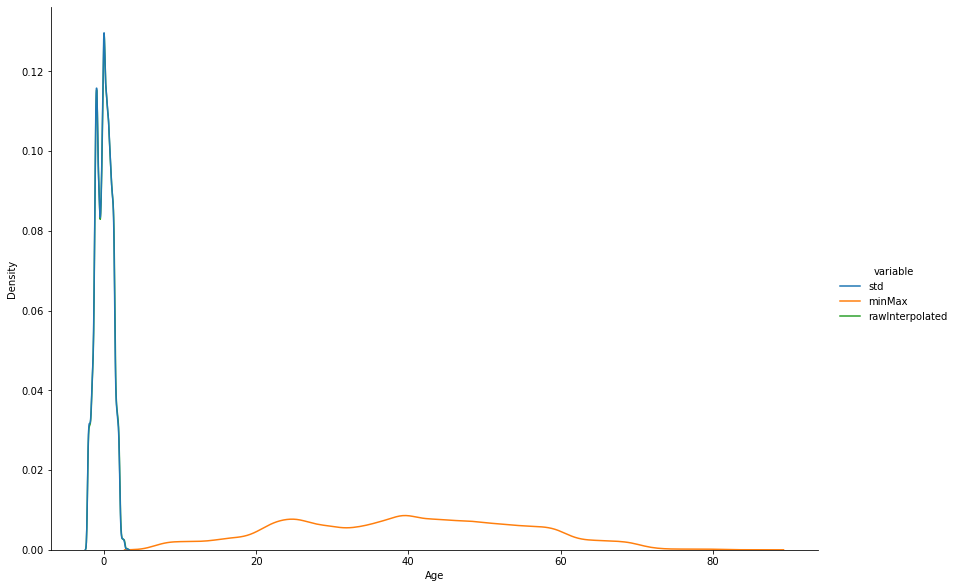

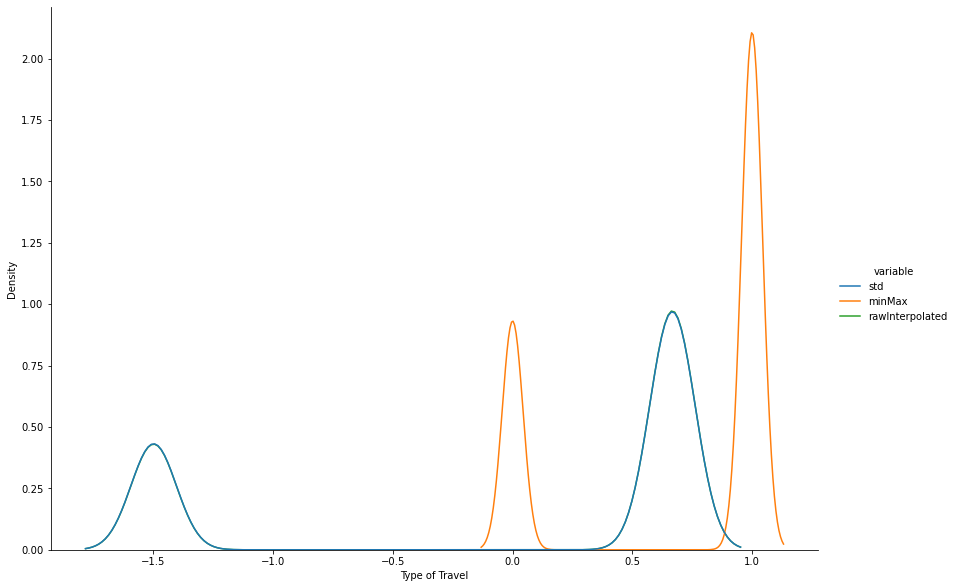

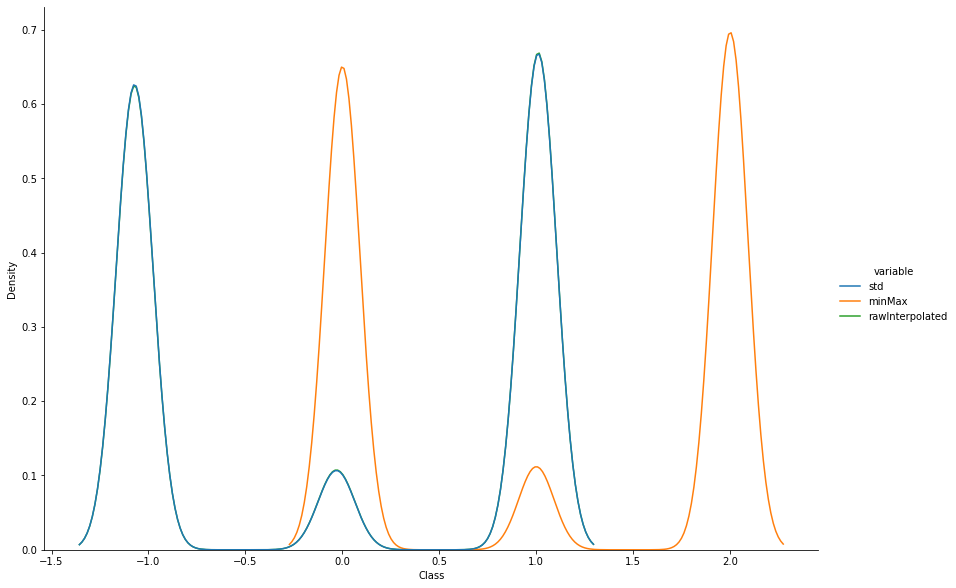

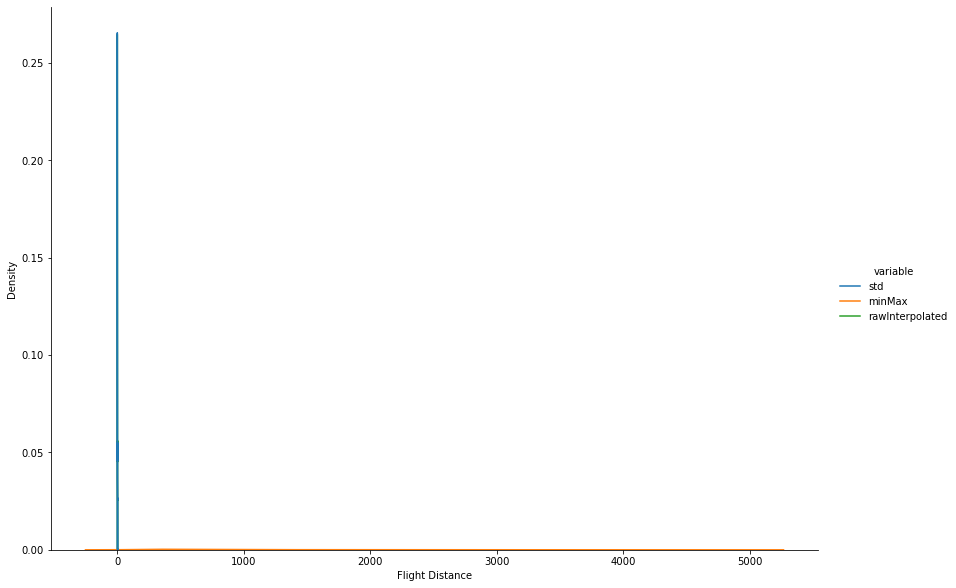

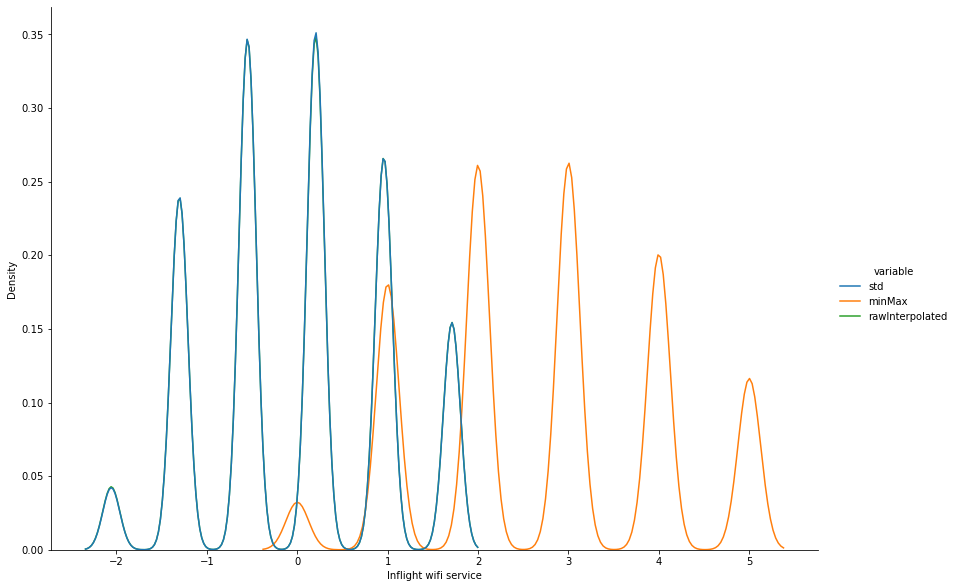

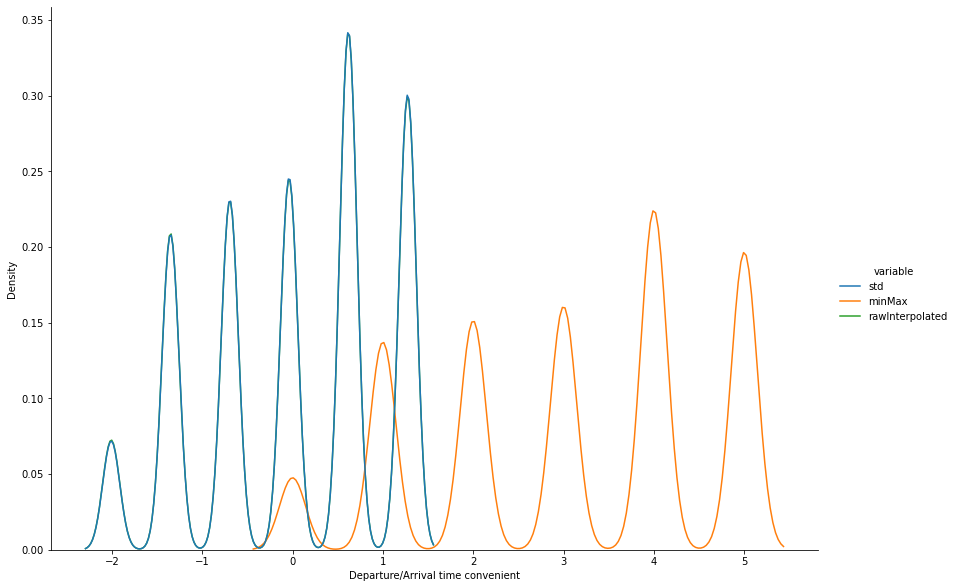

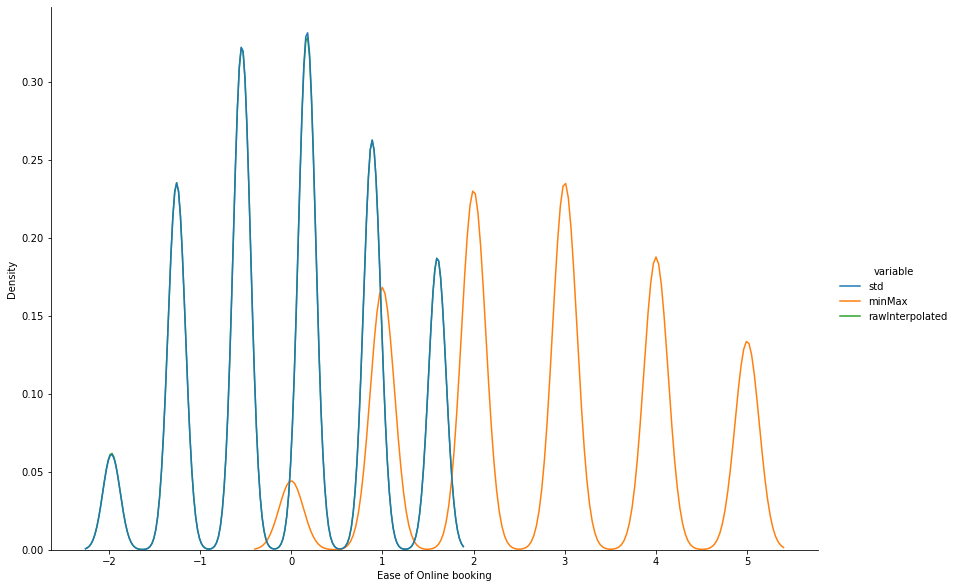

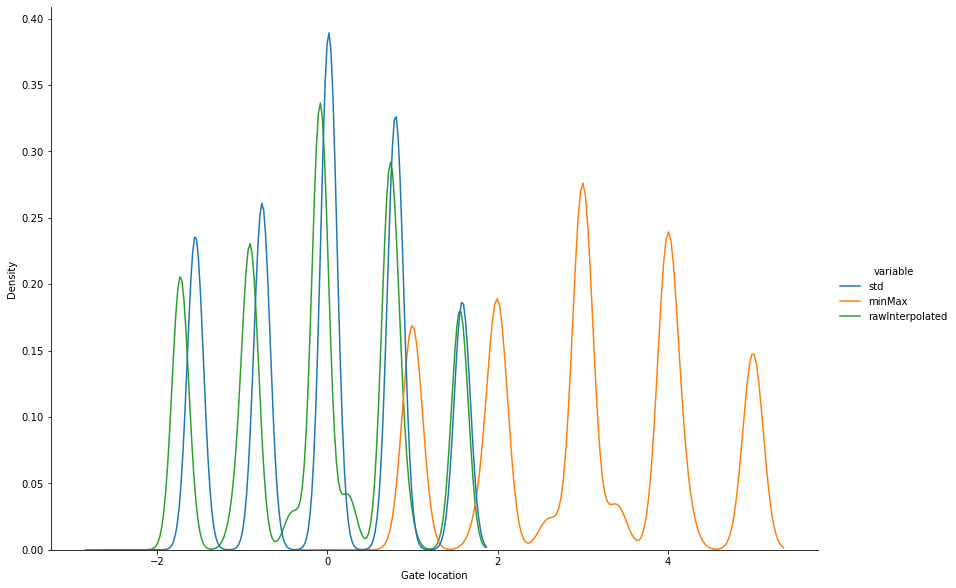

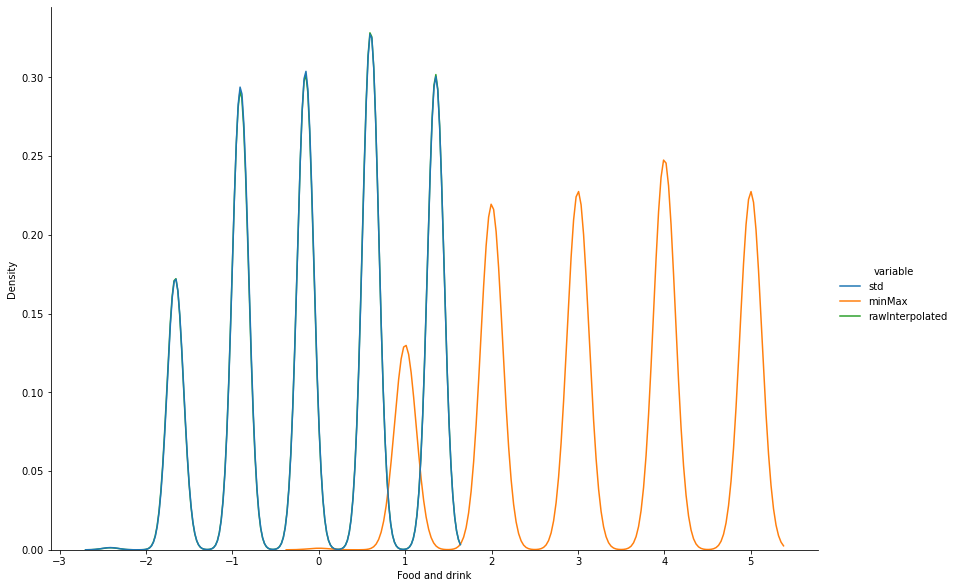

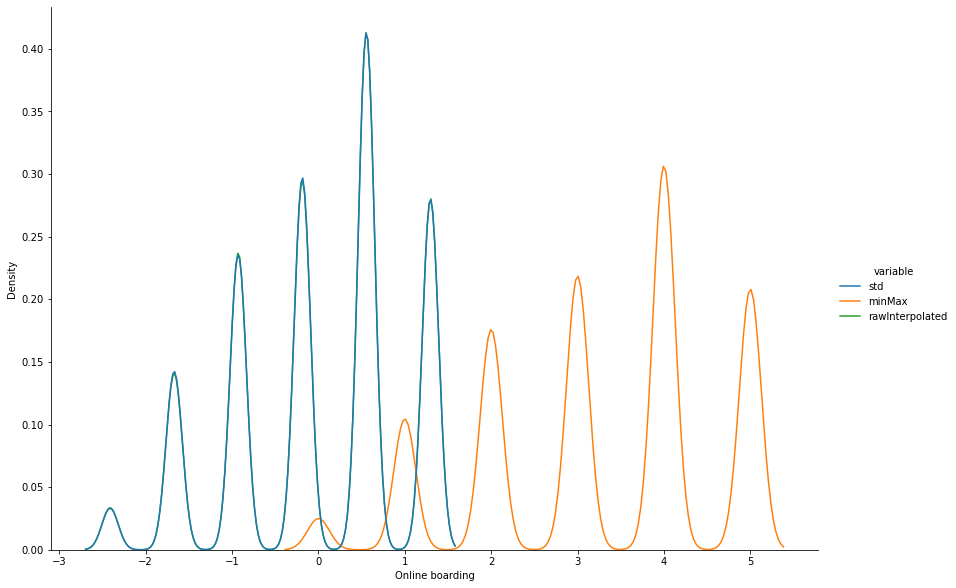

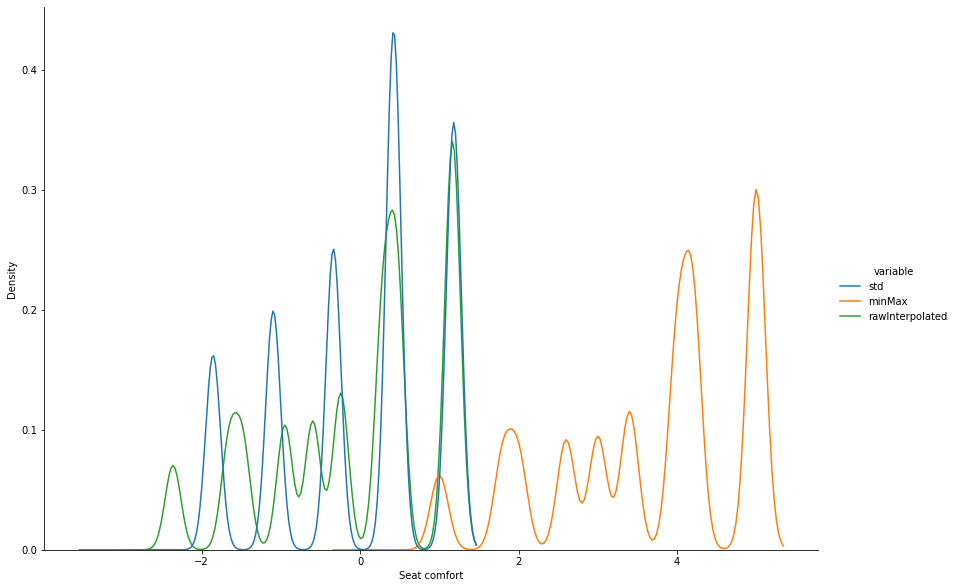

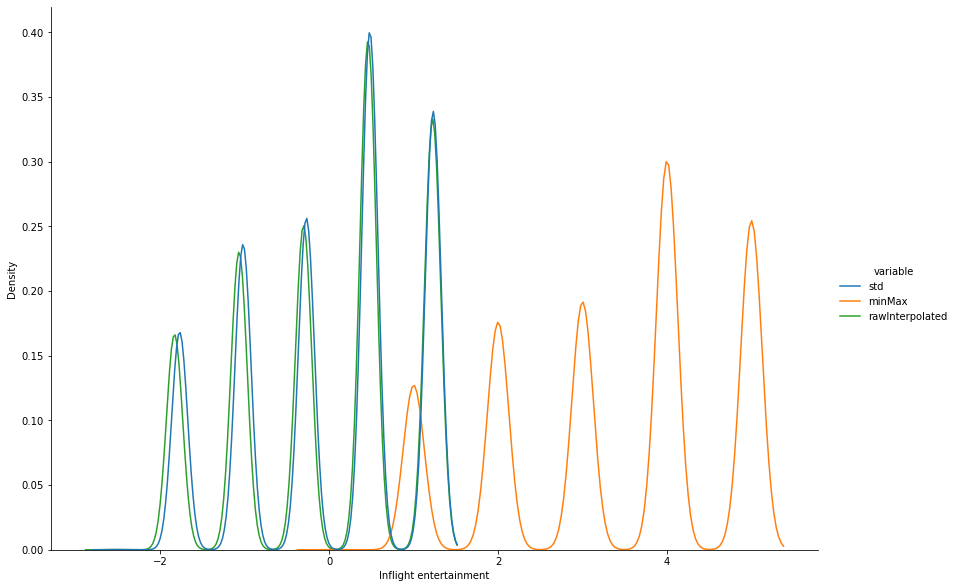

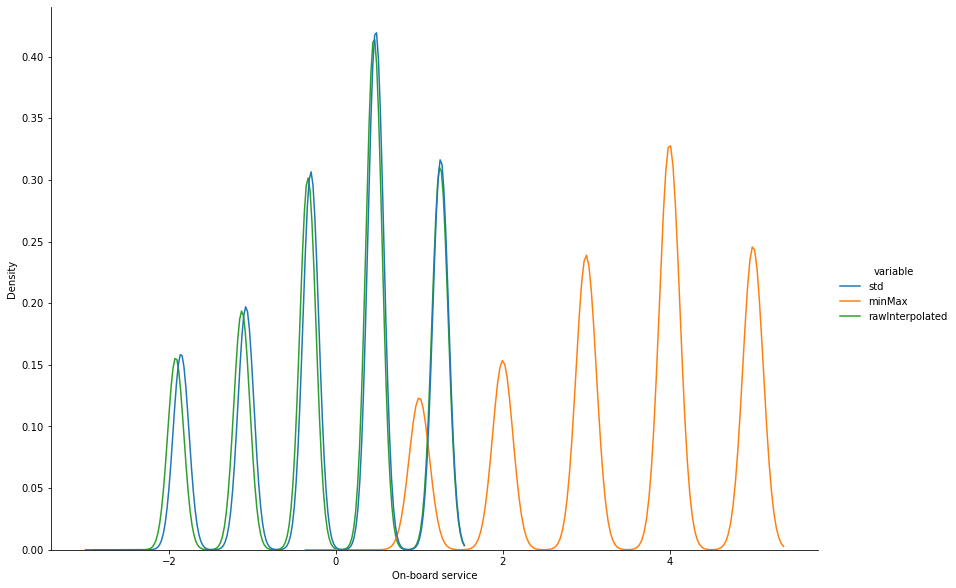

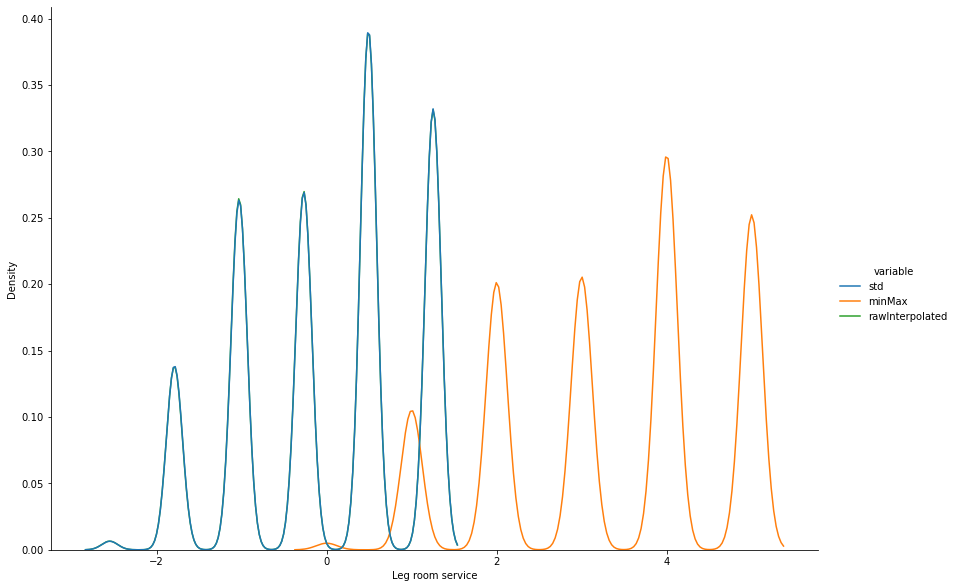

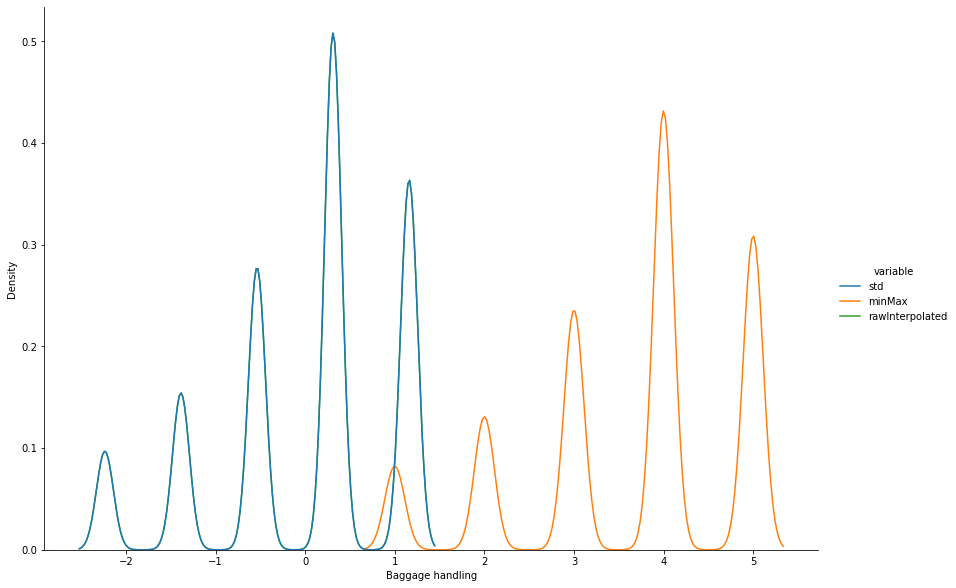

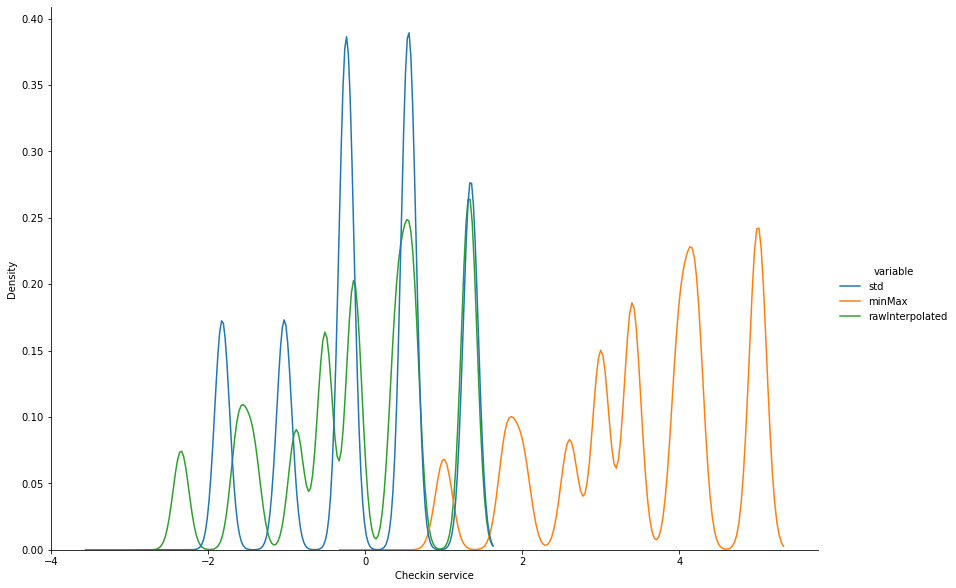

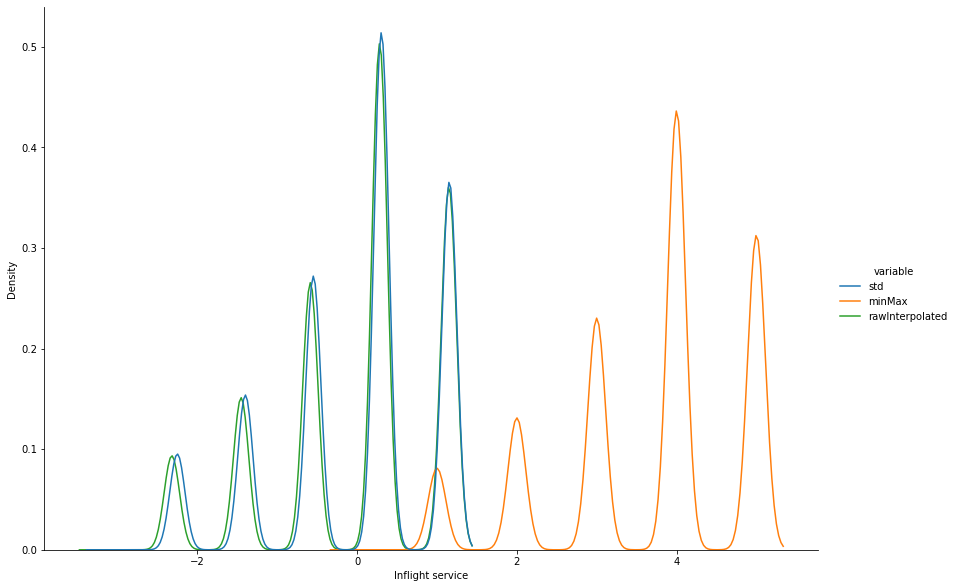

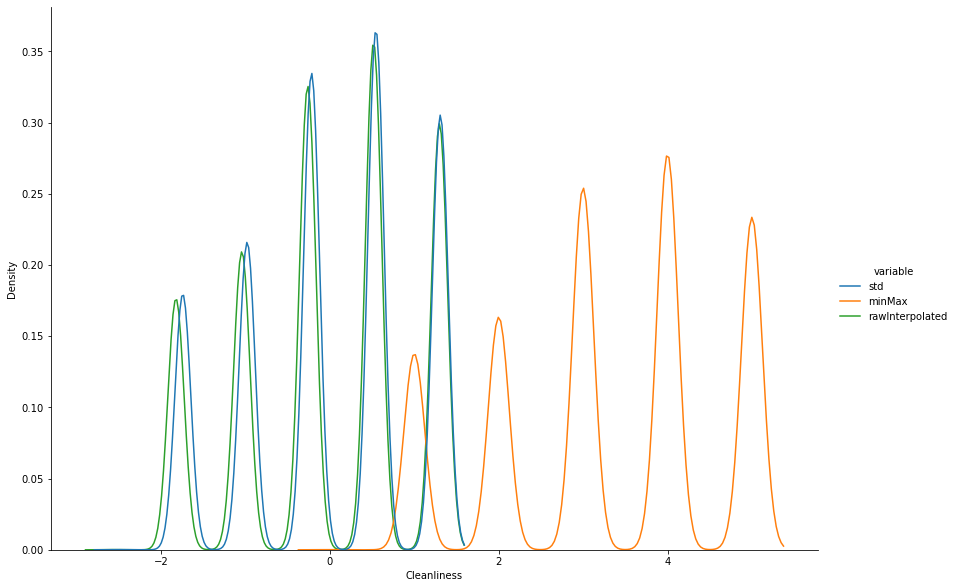

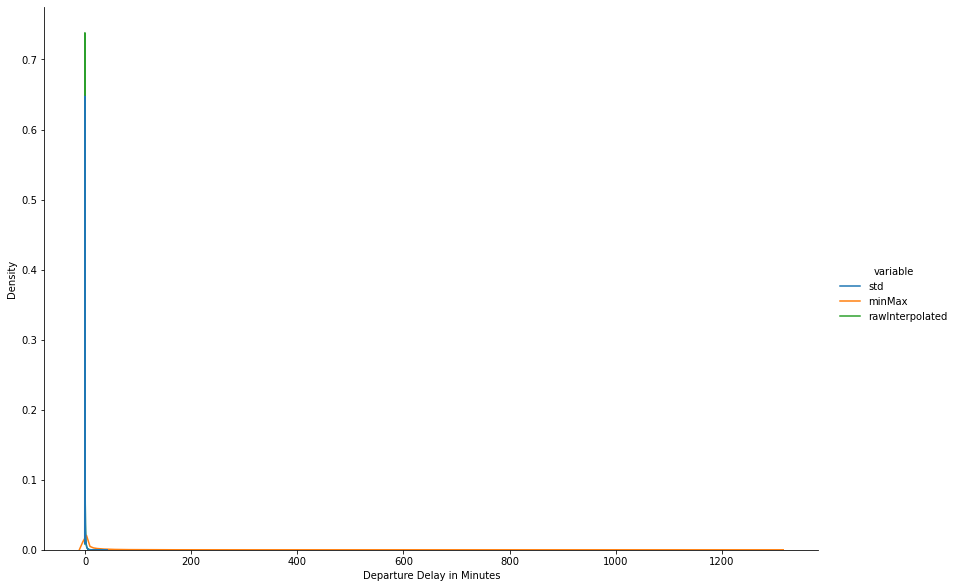

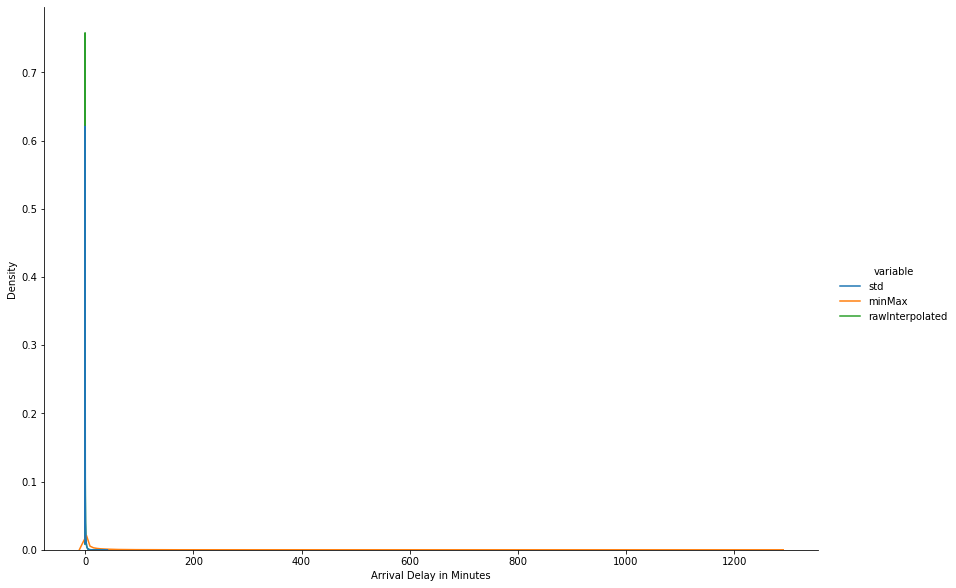

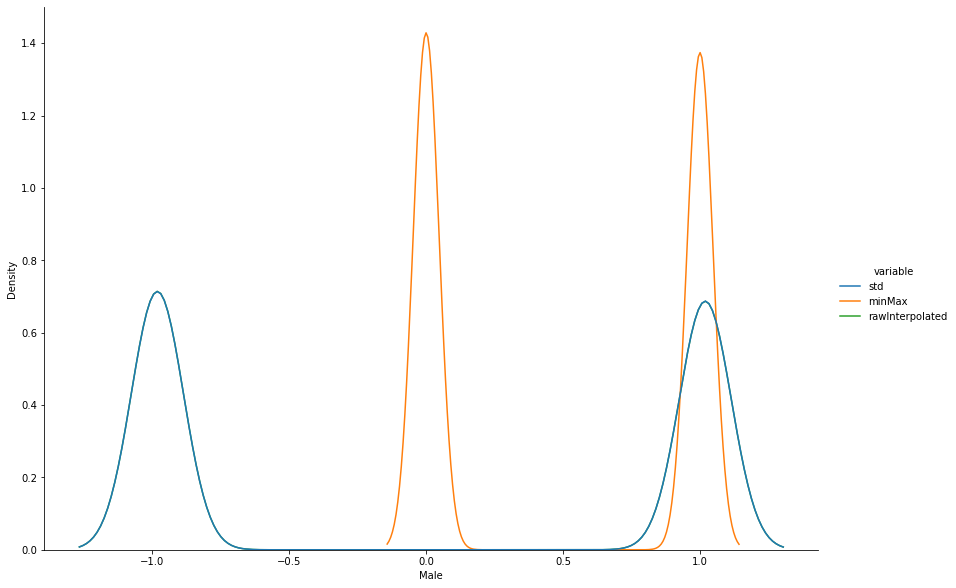

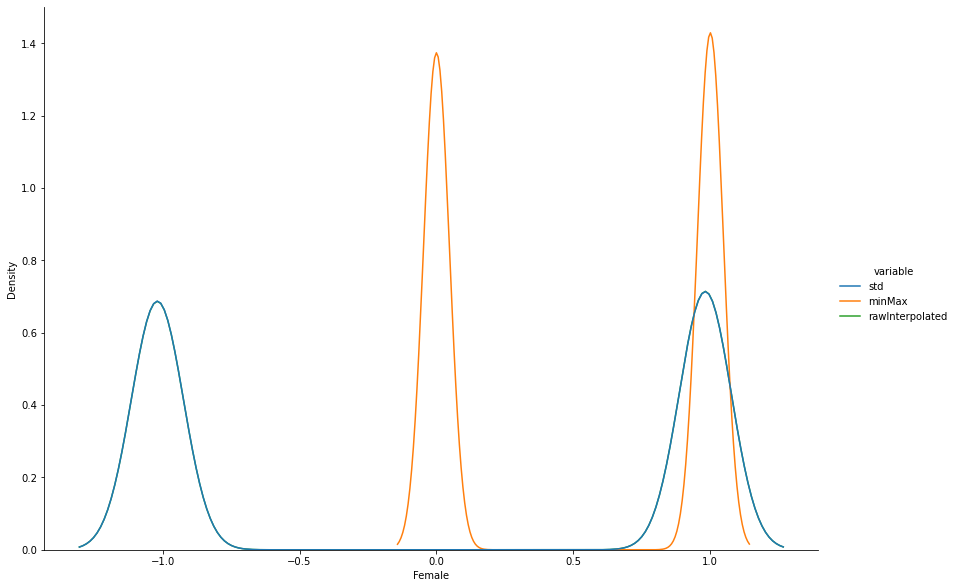

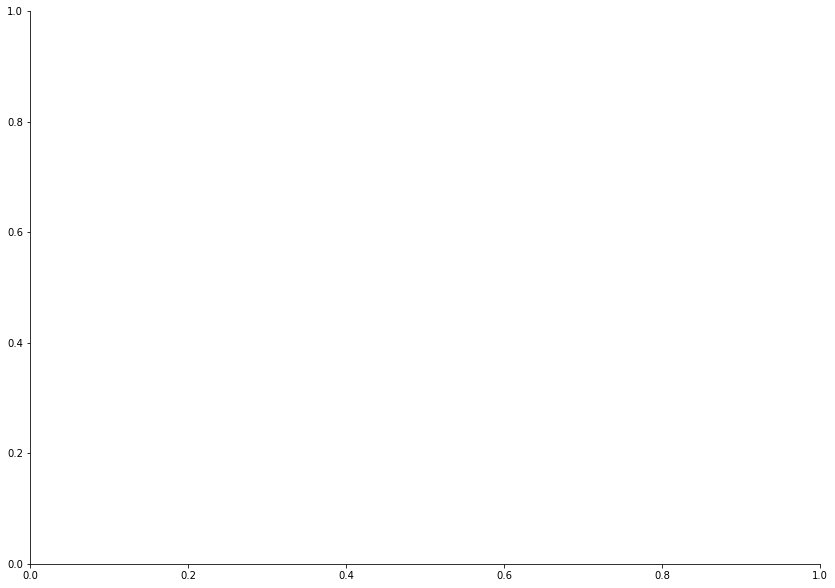

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
# displots raw, minMax, std
# a4_dims = (20, 8)
# fig, ax = plt.subplots(figsize=a4_dims)

for feature in data.columns[1:-1]:
    df = pd.DataFrame()
    df['std'] = stdData[feature]
    df['minMax'] = minMaxData[feature]
    df['rawInterpolated'] = data[feature]
    dfm = df.melt(value_vars=['std','minMax','rawInterpolated'], value_name=feature)
    sns.displot(data=dfm, x=feature, hue="variable", kind="kde", height=8.27, aspect=11.7/8.27)
    
    
#     sns.distplot(ax=ax, x=dfm[feature], rug=True, rug_kws={"color": "g"}, kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"})
    

Wykresy przestawiające rozkłady danych cech w sposób ciągły w zależności od typu standaryzacji nie zmieniły swoich kształtów, lecz zmienił się ich zakres. Jak da się zauważyć np. na wykresie dotyczącym kolumny "Checkin service" reprezentującej wartość oceny jakości obsługi w skali 0-5, standaryzacja min-max wpłyneła głównie na gęstość, delikatnie zmieniając zakres danych (przesuwając je nieco bliżej zera). Natomiast jeśli chodzi o standaryzację standadową, ta nieco nawet rozciągnęła dane wzdłuż osi pionowej i wyraźnie przeskalowała zakres, tak iż wartości rozkładają się mniej więcej po równo wokół zera. Pozostałe wykresy dostarczają podobnych obserwacji, zatem standa 

### Results

Wybrany zbiór został wstępnie przetworzony w celu lepszego przystosowania do nauki mododelu ML, ktoki jakie zostały wykonane:
1. Uzupełnienie wartości brakujących
2. Usunięcie wartości odstających
3. Ręczna standaryzacja
4. Wizualizacja danych

# Sklearn scaling 

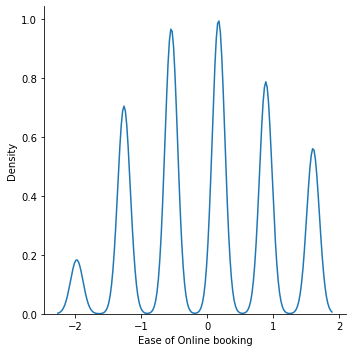

In [38]:
df_std = data.copy()
df_std.drop(['ind'], 1, inplace=True)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(df_std)
df_std = scaler.transform(df_std)

df_std = pd.DataFrame(df_std, columns=data.columns[:-1])

sns.displot(data=df_std, x='Ease of Online booking', kind="kde")

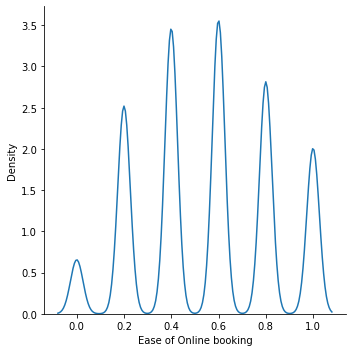

In [39]:
df_mm = data.copy()
df_mm.drop(['ind'], 1, inplace=True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(df_mm)
df_mm = scaler.transform(df_mm)

df_mm = pd.DataFrame(df_mm, columns=data.columns[:-1])

sns.displot(data=df_mm, x='Ease of Online booking', kind="kde")

In [40]:
# splitting data back to test and train dataset
test, train = data[data["ind"].eq("test")], data[data["ind"].eq("train")]

In [41]:
data['satisfaction'] = data['satisfaction'].apply(lambda x: int(x))

In [42]:
data

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Male,Female,ind,satisfaction
0,0.472335,0.848788,0.667217,-1.071681,-1.037182,1.710650,0.618515,0.173020,0.737944,-0.155107,...,1.160189,-1.430735,1.148858,1.297846,1.022685,0.839869,-0.981277,0.981322,test,1
1,0.472335,-0.216333,0.667217,1.010115,1.679691,-1.303963,-1.350293,0.173020,-1.724402,1.352458,...,0.311247,-0.513249,0.281672,1.297846,-0.374402,-0.380357,-0.981277,0.981322,test,1
2,-2.117124,-1.281454,0.667217,-1.071681,-1.005018,-0.550310,-2.006563,-0.541737,0.737944,-0.908889,...,-0.537696,-1.430735,-1.452699,-1.043356,-0.374402,-0.380357,1.019072,-1.019025,test,0
3,0.472335,0.316227,0.667217,1.010115,2.196329,-2.057616,-2.006563,-1.971252,-0.903620,-0.155107,...,-2.235580,-0.513249,-2.319884,0.517445,-0.374402,-0.213963,1.019072,-1.019025,test,1
4,0.472335,0.649078,0.667217,-1.071681,-0.009937,-0.550310,-0.037754,0.887777,-0.082838,0.598676,...,-1.386638,0.404238,-1.452699,0.517445,-0.374402,0.174291,-0.981277,0.981322,test,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,-2.117124,-0.779618,0.667217,-1.071681,-0.934595,-0.399579,-0.956532,-0.398786,0.902101,-0.758133,...,0.311247,-0.329751,0.455109,-0.887276,-0.374033,-0.380357,-0.981277,0.981322,train,0
129876,0.472335,-0.180488,0.667217,1.010115,0.440341,0.504805,0.224754,0.458923,1.230413,-0.758133,...,1.160189,1.321725,1.148858,0.049205,-0.374402,-0.380357,1.019072,-1.019025,train,1
129877,-2.117124,-0.991277,0.667217,1.010115,0.203779,-1.303963,-1.087785,-0.970592,0.902101,0.146406,...,-0.325460,1.321725,1.148858,0.049205,-0.373542,-0.376926,1.019072,-1.019025,train,0
129878,-2.117124,-1.084304,0.667217,-1.071681,-0.050669,-1.303963,-1.087785,-0.970592,1.558726,-1.662672,...,-2.235580,1.321725,0.108235,-1.823757,-0.374402,-0.380357,-0.981277,0.981322,train,0


In [43]:
%store data

Stored 'data' (DataFrame)
